In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Equipotentials

We want to plot the effective potential along the line connecting the stars.

The general potential is
\begin{equation}
\Phi = -G \left ( \frac{M_1}{s_1} + \frac{M_2}{s_2} \right ) - \frac{1}{2} \omega^2 r^2
\end{equation}

This is written such that the center of mass is at the origin of coordinates.  With the stars on the $x$-axis, the
configuration looks like:

![configuration of the masses](binary_diagram.png)

We imagine putting a test mass, $m$, on the $x$-axis and asking what is the potential that it feels.  Then $s_1$ and $s_2$ are the distances from star 1 and star 2 to the test mass, respectively, and $r$ is the distance from the center of mass (origin) to the test mass.

## a

The center of mass condition is $M_1 |r_1| = M_2 |r_2|$, where $r_1$ and $r_2$ are the distances from the star to the center of mass (the radius of their respective orbits).  We also know that $a = |r_1| + |r_2|$.

In our coordinate system, $r_1 < 0$, so we can write this as:
\begin{eqnarray}
-M_1 r_1 &=& M_2 r_2 \\
-r_1 + r_2 &=& a
\end{eqnarray}

Solving this system, we get:
\begin{eqnarray}
r_1 &=& -\frac{M_2}{M_1 + M_2} a \\
r_2 &=& \frac{M_1}{M_1 + M_2} a
\end{eqnarray}

Now we can write down the distances, $s_1$ and $s_2$:
\begin{eqnarray}
s_1 &=& | x - r_1| \\
s_2 &=& | x - r_2 | 
\end{eqnarray}
and the distance from the center of mass to our test mass, $r$:
\begin{equation}
r = |x|
\end{equation}

Note that it is the distance that matters in the potential, hence we need to take absolute values.

## b

Kepler's third law is:
\begin{equation}
\frac{4\pi^2 a^3}{G} = (M_1 + M_2) P^2
\end{equation}

Recognizing that the angular velocity, $\omega$, is $\omega = 2\pi/P$, we have
\begin{equation}
\omega^2 = \left (\frac{2\pi}{P} \right)^2 = \frac{G(M_1 + M_2)}{a^3}
\end{equation}

Then we have
\begin{equation}
\Phi = -G \left ( \frac{M_1}{|x - r_1|} + \frac{M_2}{|x - r_2|} \right ) - \frac{1}{2} \frac{G(M_1 + M_2)}{a^3} |x|^2
\end{equation}

## c

Now we want to plot our potential.

This defines the potential divided by $G(M_1 + M_2)/a$

In [2]:
def phi_x(x, M1, M2, a):
    r1 = -M2*a/(M1 + M2)
    r2 = M1*a/(M1 + M2)
    
    s1 = np.abs(x - r1)
    s2 = np.abs(x - r2)
    
    phi = (-(M1/s1 + M2/s2) - 0.5*(M1 + M2)/a**3 * np.abs(x)**2) / ((M1 + M2)/a)
    return phi

Define the parameters for this problem -- the masses of the stars and their separation.

In [3]:
Msun = 2.e33
Rsun = 7.e10

M1 = 0.8*Msun
M2 = 0.2*Msun
a = Rsun

Define the range of $x$ that we will plot

In [4]:
x = np.linspace(-3*a, 3*a, 200)

Now make the plot

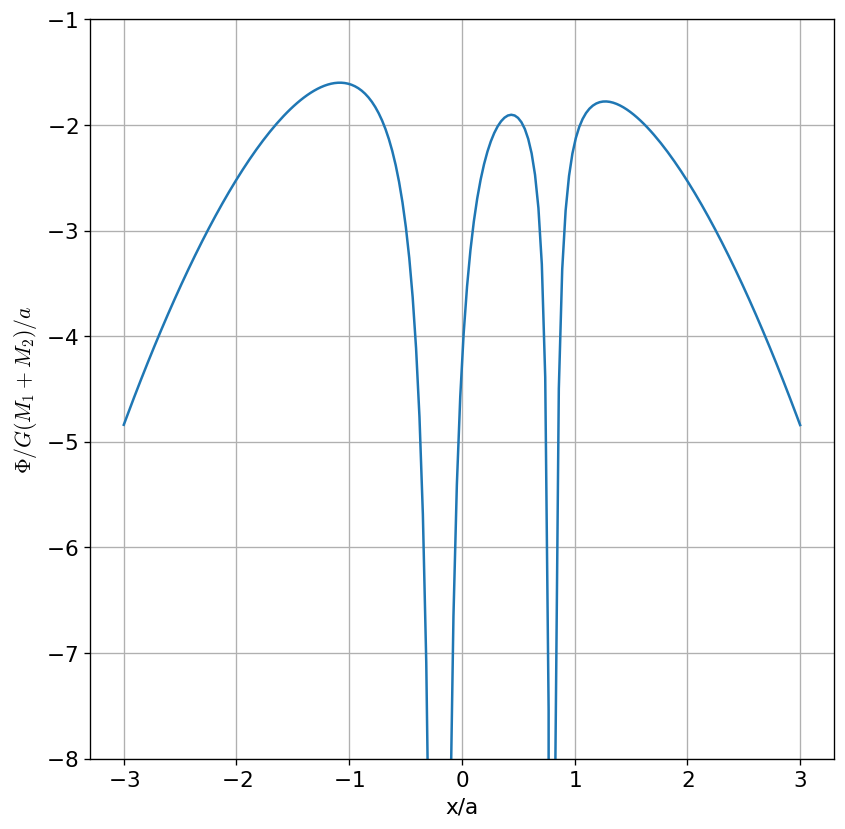

In [5]:
fig = plt.figure()
fig.set_size_inches((8,8))
ax = fig.add_subplot(111)
ax.plot(x/a, phi_x(x, M1, M2, a))
ax.set_ylim(-8, -1)
ax.set_xlabel("x/a")
ax.set_ylabel(r"$\Phi / G(M_1 + M_2)/a$")
ax.grid()

## d 

We could find the extrema approximately just by looking at the above plot, there are 3, $x/a \sim -1$, $x/a \sim 0.5$, $x/a \sim 1.2$.

But I'll find the extrema more accurately using SciPy.  

First I create a wrapper to our potential function above.  This will work in terms of $x/a$, and it will also return the negative of $\Phi$, since the SciPy routines find minima.

In [6]:
from scipy import optimize
def phi_min(x, M1, M2, a):
    """accept x in units of semi-major axis and return -phi, to minimize"""
    return -1 * phi_x(x*a, M1, M2, a)

Now I'll do a bounded search -- specifying the range in which I think the extrema exists.  I'll do this 3 times, once for each of the extrema.

In [7]:
res = optimize.minimize_scalar(phi_min, args=(M1, M2, a), method="bounded", bounds=[1, 2])
e1 = res.x

In [8]:
res = optimize.minimize_scalar(phi_min, args=(M1, M2, a), method="bounded", bounds=[0, 1])
e2 = res.x

In [9]:
res = optimize.minimize_scalar(phi_min, args=(M1, M2, a), method="bounded", bounds=[-2,-0.1])
e3 = res.x

Now lets plot these on our figure.

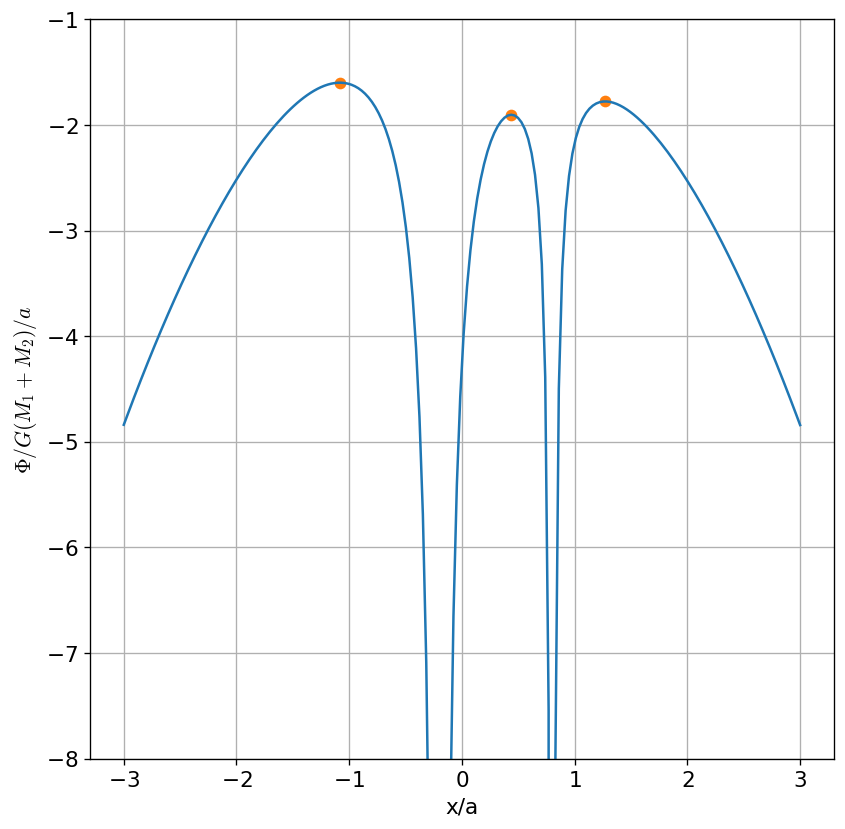

In [10]:
ax.scatter([e1, e2, e3],
           [phi_x(e1*a, M1, M2, a), phi_x(e2*a, M1, M2, a), phi_x(e3*a, M1, M2, a)],
           color="C1")
fig

And here are the numerical values (in terms of $x/a$)

In [11]:
print(e1, e2, e3)

1.2710492549544008 0.4380757508384117 -1.0828391554938734


## e

Each of the above Lagrange points are maxima, so they are unstable.